In [1]:
%load_ext autoreload
%autoreload 2

In [12]:
import numpy as np
import scipy.special as special
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pickle, json
import astropy.constants as c
import astropy.units as u
from mpmath import *
from sympy import *
import sympy
from sympy.solvers import solve
from sympy.plotting import plot

In [3]:
# symbolic calculation (for future reference)
x = symbols('x')
a = Integral(cos(x)*exp(x), x)
Eq(a, a.doit())

Eq(Integral(exp(x)*cos(x), x), exp(x)*sin(x)/2 + exp(x)*cos(x)/2)

t0 = 1.4809609793861218
period = 8.885765876316732


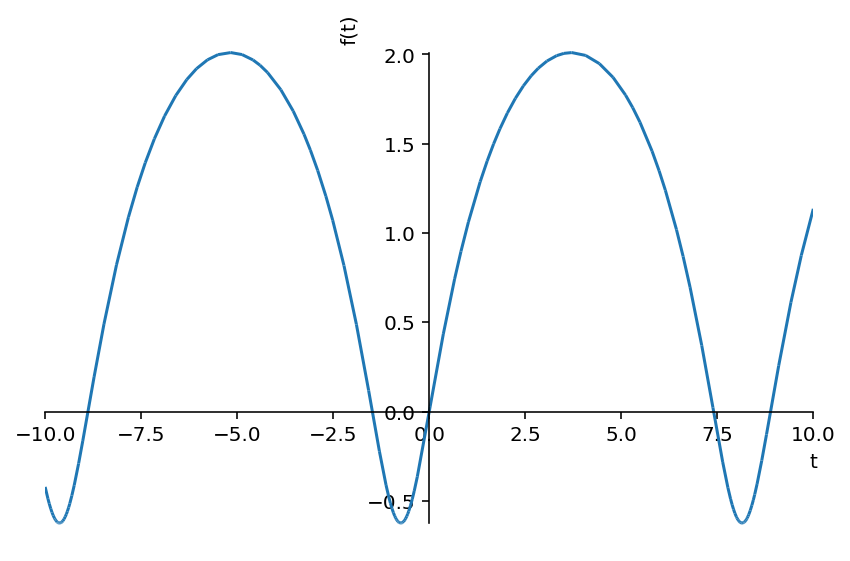

t0 = -0.7071067811865475
x0 = -0.6931471805599453


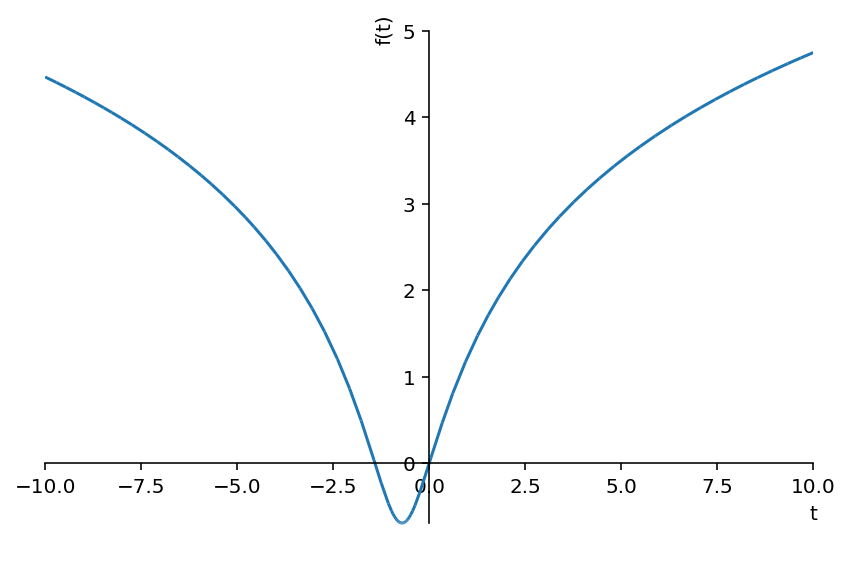

t0 = 0.5731079173902944


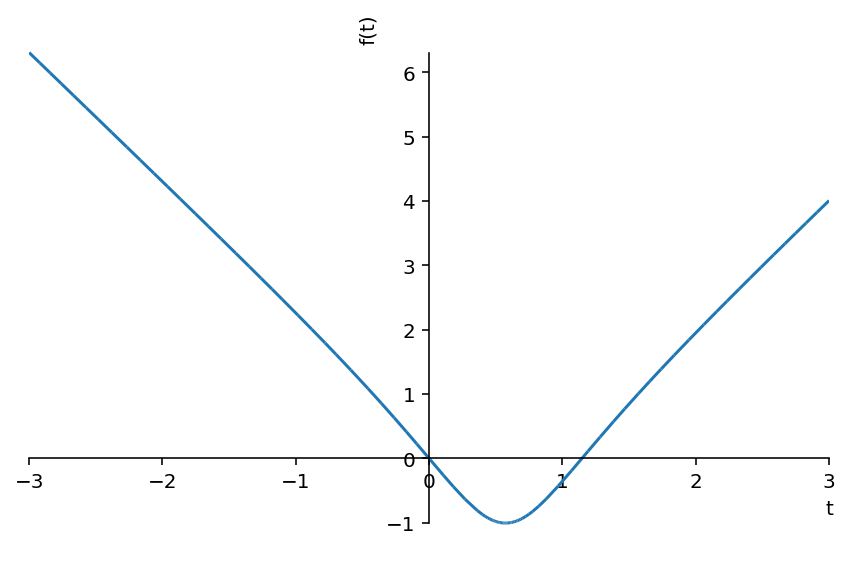

In [4]:
# problem 1a
x, t = symbols('x, t') 

# bound solution
E = -0.25
t0 = (1/np.sqrt(2*abs(E))) * np.arcsin(np.sqrt(1-abs(E)))
T = 2*np.pi/np.sqrt(2*abs(E))
print('t0 =', t0)
print('period =', T)

x = log( (1/abs(E)) * (1 + np.sqrt(1-abs(E)) * sin(np.sqrt(2*abs(E)) * (t-t0)) )  )
plot(x)

# critical solution
E = 0
t0 = -1/np.sqrt(2)
print('t0 =', t0)
x0 = -np.log(2)
print('x0 =', x0)
x = log( 1/2 + (t-t0)**2 )
plot(x)

# scattering solution
E = 2
t0 = (1/np.sqrt(2*E)) * np.arccosh(np.sqrt(1+E))
print('t0 =', t0)

x = log( (1/E) * (-1 + np.sqrt(1+E) * cosh(np.sqrt(2*E) * (t-t0)) )  )
plot(x, (t, -3, 3))

period = 8.885765876316732


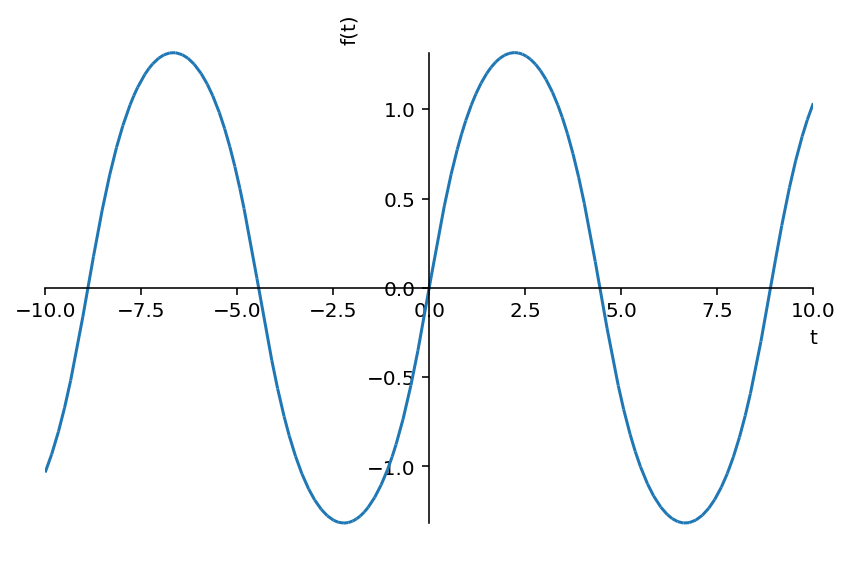

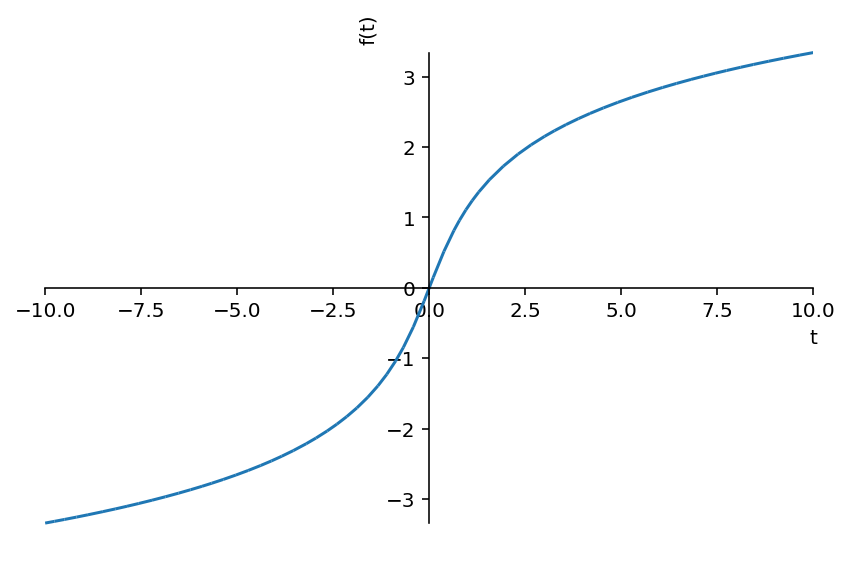

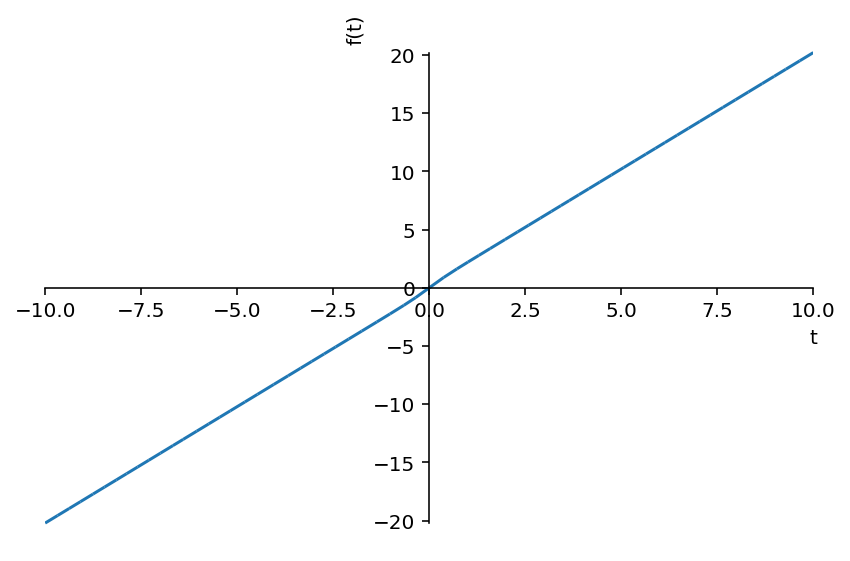

In [5]:
# problem 1.1(b)
x, t = symbols('x, t') 

# bound solution
E = -0.25
T = 2*np.pi/np.sqrt(2*abs(E))
print('period =', T)

x = asinh( np.sqrt(-1 + 1/abs(E)) * sin( np.sqrt(2*abs(E)) * t) )
plot(x)

# critical solution
E = 0
x = asinh( np.sqrt(2) * t )
plot(x)

# scattering solution
E = 2

x = asinh( np.sqrt(1 + 1/E) * sinh(np.sqrt(2*E) * t) )
plot(x)

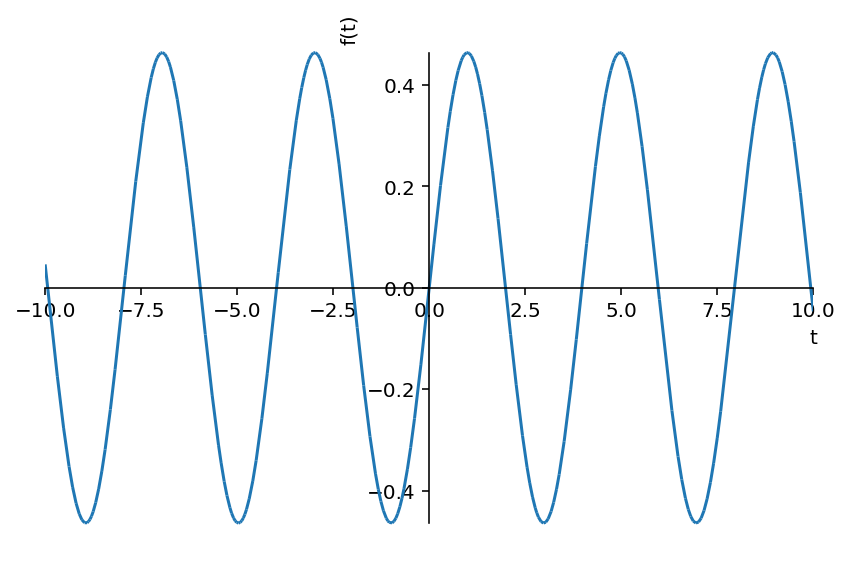

In [6]:
# problem 1.1(c)

# only bound solutions with E>0
x, t = symbols('x, t')
E = 0.25
U0 = 1

x = asin( np.sqrt(E/(E+U0)) * sin (np.sqrt(2*(E+U0)) * t) )
plot(x)

Text(0, 0.5, '$\\phi$')

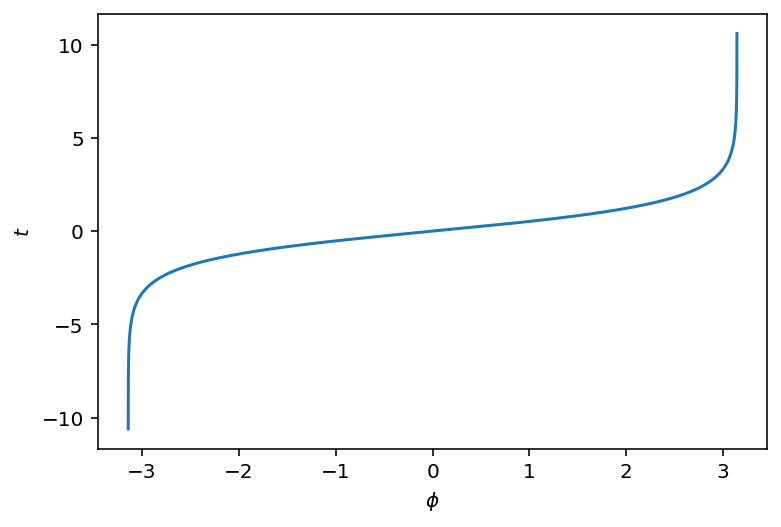

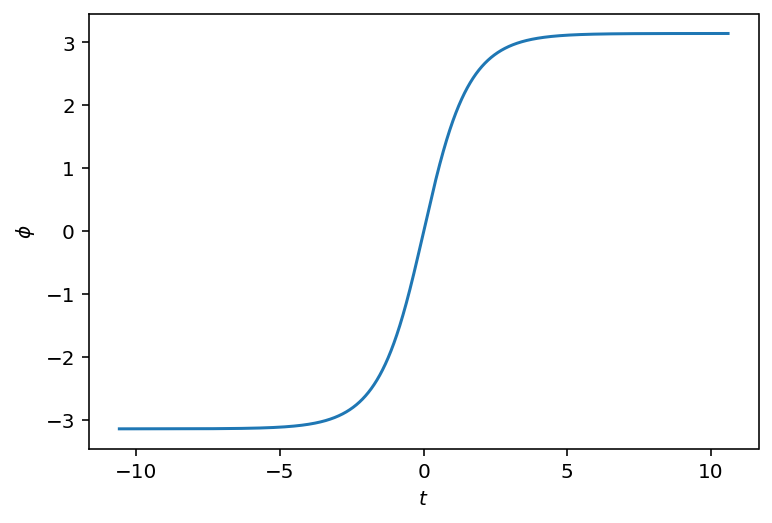

In [7]:
# problem 1.6
eps = 1e-4
phi = np.linspace(-np.pi+eps, np.pi-eps, 10000)

t = np.log(1./np.cos(phi/2) + np.tan(phi/2))

plt.figure()
plt.plot(phi, t)
plt.xlabel('$\phi$')
plt.ylabel('$t$')

plt.figure()
plt.plot(t, phi)
plt.xlabel('$t$')
plt.ylabel('$\phi$')

In [46]:
# period of pendulum (approx and exact expressions)

# constants
m = 1 # kg
g = 9.8 # m/s^2
ell = 1 # m

# definitions
U_m = 2*m*g*ell
E = (1 + 1e-6)*U_m
eps = E-U_m

# from prob 1.6, KS is kotkin & serbo answer (incorrect)
P_approx = (2*np.sqrt(ell/g))*np.log(2*np.pi/np.sqrt(2*eps/(m*g*ell))) 
P_KS = np.sqrt(ell/g)*np.log(0.5* (np.pi**2) * m*g*ell/eps) 
print(P_approx, P_KS)

# exact solution (agrees with P_appr)
k = np.sqrt(U_m/E)
P_exact = 2*k*np.sqrt(ell/g)*special.ellipk(k**2)  # scipy has K(m) where m=k^2
print(P_exact)

5.144544061851168 4.7017085720956375
5.298872779063663
